This is a very basic tutorial on how to fit a function using pytorch using gradient descent and basic neuroevolution

# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

#Import Pytorch
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

#Initialize numpy random generator
rng = np.random.default_rng(1)

In [2]:
#Setup shared matplotlib params
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['legend.fontsize'] = 30

# Define Network

## Start by defining network class

The network architecture is defined here using the class based approach. This offers more flexibility in customizing the network than the nn.sequential method.

In [3]:
#Define neural network with variable activation function
#Inputs:
#width: width of the netwokr
#input_size: size of the input (1D)
#output_size: output size (1D)
#act: activation function, 'Relu','Tanh','Elu'
class Net(nn.Module):
    def __init__(self,width,input_size,output_size,act):
        super(Net, self).__init__()

        self.input = nn.Linear(input_size,width) #Input layer: input layer -> width

        self.hidden = nn.Linear(width,width) #Hidden layer

        self.output = nn.Linear(width,output_size) #Output layer: width -> output_size

        if act == 'Relu':
          self.act = nn.ReLU() #relu activation function
        elif act == 'Tanh':
          self.act = nn.Tanh() #tanh activation function
        elif act == 'Elu':
          self.act = nn.ELU() #ELU activation function

    def forward(self, x):
        #Forward pass through all hidden layers with relu activation
        x = self.act(self.input(x))

        x = self.act(self.hidden(x))

        x = self.output(x) #Output layer, no activation
        return x

In [4]:
#Generate a network and save parameters
#Define network parameters
width = 128
input_size = 1
output_size = 1

model = Net(width,input_size,output_size,'Relu')
#Save parameters so all networks start from the same parameters
starting_params = model.state_dict()

# Generate some dummy data

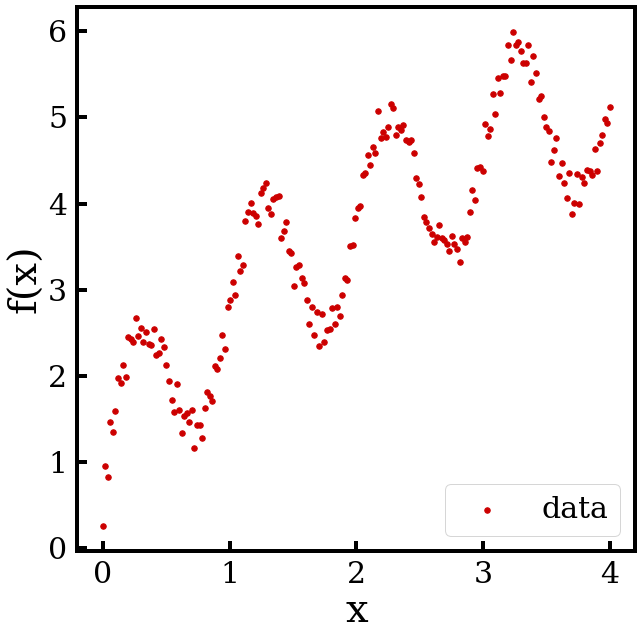

In [5]:
#Construct some noisy data
n_points = 200
x_min = 0
x_max = 4
x = np.linspace(x_min,x_max,n_points).reshape(-1,1)
y = rng.random(np.shape(x))*0.5 + np.sin(2*np.pi*x) + np.sqrt(2*np.pi*x)


plt.scatter(x,y,s=30,color=(0.8,0,0),label='data')
plt.legend(loc='lower right')
plt.tick_params(which='both',direction='in',width=4,length=10,labelsize=30,pad = 10)
plt.xlabel('x')
plt.ylabel('f(x)')

#Turn data into pytorch tensors, need to be floats
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()
data = {'x':x_tensor,'y':y_tensor}

# Gradient Descent

## Define training function

In [6]:
#Function that trains the model given an optimizer, a loss function, a number of epochs and the training data
def Train_Model(model,optimizer,loss_func,n_epochs,data):
  loss_evolution = []

  #Set the model in training mode (Not needed for this case, but good practice)
  model.train()

  #Train for n_epochs, this is single batch training --> all data is evaluated between gradient steps
  for epoch in range(n_epochs):
      #Calculate loss
      prediction = model(data['x'])
      loss = loss_func(prediction,data['y'])
      
      #Save the loss
      loss_item = loss.item()
      loss_evolution.append(loss_item)
      #Print current progress
      if epoch%(n_epochs//10)==0:
        print('Progress: %g%%, Epoch: %g, Loss: %g'%(epoch/n_epochs*100,epoch,loss_item))
      #Gradient descent
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
  print('Finished with loss: %g'%(loss_item))
  return loss_evolution

## Train network 

In [7]:
#Define hyperparameters
n_epochs = 10000
learning_rate = 0.0002

#Define network parameters
width = 128
input_size = 1
output_size = 1

### Train a network with ReLU activation

In [8]:
#Define model, load initial parameters and initialize optimizer and loss
model_relu = Net(width,input_size,output_size,'Relu')
model_relu.load_state_dict(starting_params)

optimizer = torch.optim.Adam(model_relu.parameters(), learning_rate)
loss_func = nn.MSELoss()

#Train for n_epochs
loss_evolution_relu = Train_Model(model_relu,optimizer,loss_func,n_epochs,data)

Progress: 0%, Epoch: 0, Loss: 12.1811
Progress: 10%, Epoch: 1000, Loss: 0.439552
Progress: 20%, Epoch: 2000, Loss: 0.361492
Progress: 30%, Epoch: 3000, Loss: 0.307308
Progress: 40%, Epoch: 4000, Loss: 0.246399
Progress: 50%, Epoch: 5000, Loss: 0.179241
Progress: 60%, Epoch: 6000, Loss: 0.108518
Progress: 70%, Epoch: 7000, Loss: 0.0601365
Progress: 80%, Epoch: 8000, Loss: 0.0356738
Progress: 90%, Epoch: 9000, Loss: 0.0261591
Finished with loss: 0.0231228


### Train a network with Tanh activation

In [9]:
#Define model, load initial parameters and initialize optimizer and loss
model_tanh = Net(width,input_size,output_size,'Tanh')
model_tanh.load_state_dict(starting_params)

optimizer = torch.optim.Adam(model_tanh.parameters(), learning_rate)
loss_func = nn.MSELoss()

#Train for n_epochs
loss_evolution_tanh = Train_Model(model_tanh,optimizer,loss_func,n_epochs,data)

Progress: 0%, Epoch: 0, Loss: 15.2141
Progress: 10%, Epoch: 1000, Loss: 0.483424
Progress: 20%, Epoch: 2000, Loss: 0.47827
Progress: 30%, Epoch: 3000, Loss: 0.470336
Progress: 40%, Epoch: 4000, Loss: 0.426575
Progress: 50%, Epoch: 5000, Loss: 0.260555
Progress: 60%, Epoch: 6000, Loss: 0.105758
Progress: 70%, Epoch: 7000, Loss: 0.0278813
Progress: 80%, Epoch: 8000, Loss: 0.020838
Progress: 90%, Epoch: 9000, Loss: 0.0170301
Finished with loss: 0.0163252


### Train a network with Elu activation

In [10]:
#Define model, load initial parameters and initialize optimizer and loss
model_elu = Net(width,input_size,output_size,'Elu')
model_elu.load_state_dict(starting_params)

optimizer = torch.optim.Adam(model_elu.parameters(), learning_rate)
loss_func = nn.MSELoss()

#Train for n_epochs
loss_evolution_elu = Train_Model(model_elu,optimizer,loss_func,n_epochs,data)

Progress: 0%, Epoch: 0, Loss: 13.734
Progress: 10%, Epoch: 1000, Loss: 0.487808
Progress: 20%, Epoch: 2000, Loss: 0.4818
Progress: 30%, Epoch: 3000, Loss: 0.470324
Progress: 40%, Epoch: 4000, Loss: 0.419529
Progress: 50%, Epoch: 5000, Loss: 0.296958
Progress: 60%, Epoch: 6000, Loss: 0.100541
Progress: 70%, Epoch: 7000, Loss: 0.0507636
Progress: 80%, Epoch: 8000, Loss: 0.044688
Progress: 90%, Epoch: 9000, Loss: 0.0367528
Finished with loss: 0.0270556


## Plot the loss and prediction

### Plot the loss for all 3 networks

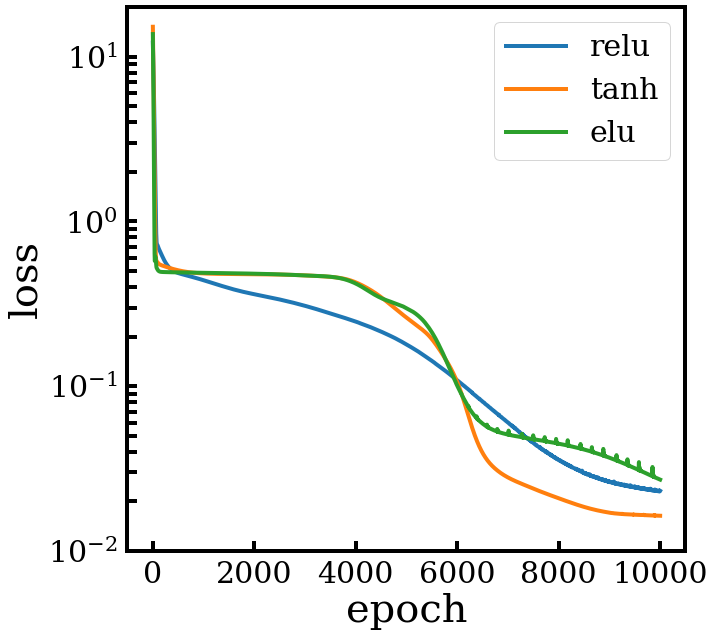

In [11]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(loss_evolution_relu,label='relu')
ax.plot(loss_evolution_tanh,label='tanh')
ax.plot(loss_evolution_elu,label='elu')
ax.tick_params(which='both',direction='in',width=4,length=10,labelsize=30,pad = 10)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_ylim(1e-2,20)
ax.legend()
ax.set_yscale('log')

### Plot the predictions for all 3 networks

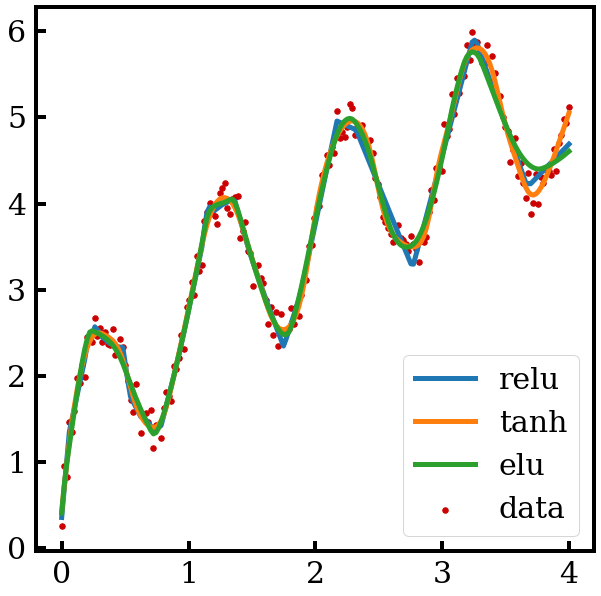

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
#When either testing or evaluation the network, good practice is to set the model in "evaluation" model and wrap block in "torch.no_grad()"
models = [model_relu,model_tanh,model_elu]
legends = ['relu','tanh','elu']
with torch.no_grad():
  for i in range(len(models)):
    models[i].eval()
    prediction = models[i](x_tensor)
    pred = prediction.numpy()
    ax.plot(x,pred,lw=5,label = legends[i])
  ax.scatter(x,y,s=30,color=(0.8,0,0),label='data')
  ax.tick_params(which='both',direction='in',width=4,length=10,labelsize=30,pad = 10)
  ax.legend(loc='lower right')

# Neuroevolution - zero temperature Monte Carlo training

Let's also train a network using neuroevolution, since we no longer use gradient descent, we need to manually update the weights. A small perturbation is added to each parameter of the network, if the loss is less than the previous loss, these perturbations are kept.

In [13]:
#Function that trains the model given a sigma, a loss function, a number of epochs and the training data
def Train_Model_Neuro(model,sigma,loss_func,n_epochs,data):
  loss_evolution = []

  #Train for n_epochs
  with torch.no_grad():
    #Calculate starting loss
    prediction = model(data['x'])
    old_loss = loss_func(prediction,data['y']).item()
    for epoch in range(n_epochs):
        #Propose trial parameters
        old_par = copy.deepcopy(model.state_dict())
        #Update model parameters with Gaussian
        for name,p in model.named_parameters():
          p += torch.empty(p.size()).normal_(mean=0,std=sigma)

        prediction = model(data['x'])
        new_loss = loss_func(prediction,data['y']).item()

        #If new loss is less than old loss, keep it
        if new_loss < old_loss:
          old_loss = new_loss
        #Otherwise keep old params
        else:
          model.load_state_dict(old_par)
          new_loss = old_loss
        #Save the loss
        loss_evolution.append(new_loss)
        #Print current progress
        if epoch%(n_epochs//10)==0:
          print('Progress: %g%%, Epoch: %g, Loss: %g'%(epoch/n_epochs*100,epoch,new_loss))
    print('Finished with loss: %g'%(new_loss))
  return loss_evolution

## Train a neural network with Tanh activation using neuroevolution

In [18]:
#Define hyperparameters
n_epochs = 100000
sigma = 0.002

In [19]:
#Define model, optimizer and loss
model_tanh_neuro = Net(width,input_size,output_size,'Tanh')
model_tanh_neuro.load_state_dict(starting_params)

loss_func = nn.MSELoss()

#Train for n_epochs
loss_evolution_tanh_neuro = Train_Model_Neuro(model_tanh_neuro,sigma,loss_func,n_epochs,data)

Progress: 0%, Epoch: 0, Loss: 15.2141
Progress: 10%, Epoch: 10000, Loss: 0.449189
Progress: 20%, Epoch: 20000, Loss: 0.322087
Progress: 30%, Epoch: 30000, Loss: 0.244058
Progress: 40%, Epoch: 40000, Loss: 0.222106
Progress: 50%, Epoch: 50000, Loss: 0.20647
Progress: 60%, Epoch: 60000, Loss: 0.159347
Progress: 70%, Epoch: 70000, Loss: 0.0879003
Progress: 80%, Epoch: 80000, Loss: 0.0689715
Progress: 90%, Epoch: 90000, Loss: 0.0634985
Finished with loss: 0.0616025


## Plot loss and prediction

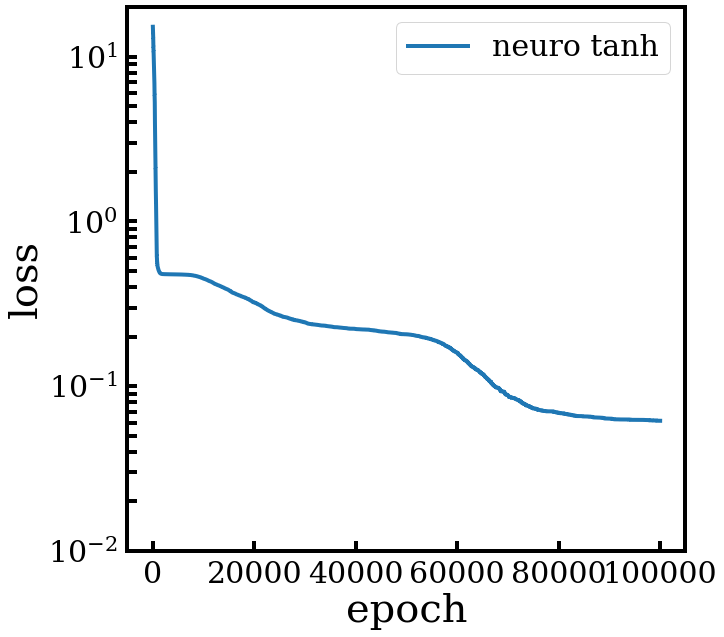

In [20]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(loss_evolution_tanh_neuro,label='neuro tanh')
ax.tick_params(which='both',direction='in',width=4,length=10,labelsize=30,pad = 10)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_ylim(1e-2,20)
ax.legend()
ax.set_yscale('log')

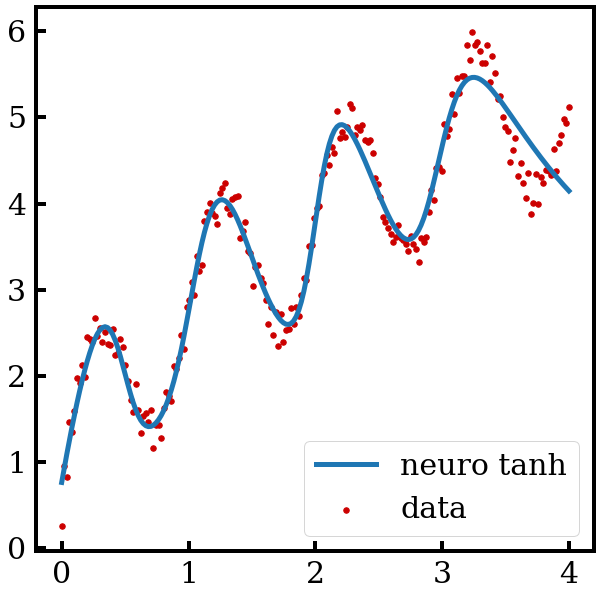

In [21]:
fig,ax = plt.subplots(figsize=(10,10))
#When either testing or evaluation the network, good practice is to set the model in "evaluation" model and wrap block in "torch.no_grad()"
models = [model_tanh_neuro]
legends = ['neuro tanh']
with torch.no_grad():
  for i in range(len(models)):
    models[i].eval()
    prediction = models[i](x_tensor)
    pred = prediction.numpy()
    ax.plot(x,pred,lw=5,label = legends[i])
  ax.scatter(x,y,s=30,color=(0.8,0,0),label='data')
  ax.tick_params(which='both',direction='in',width=4,length=10,labelsize=30,pad = 10)
  ax.legend(loc='lower right')